# Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Cleaning – Ensuring Data Quality
In this initial phase, we focus on preparing our data for analysis. We start by checking for and handling any missing values, removing duplicate entries, and standardizing column formats. This ensures that our data is clean, consistent, and reliable, setting a solid foundation for the advanced analyses to come.

Data cleaning is essential because high-quality data leads to more accurate insights, enabling us to trust the results of our sentiment and topic analyses later on.



In [3]:
# Load the dataset
df = pd.read_csv('/Users/vedantpramodwagh/Documents/Projects /Reviews.csv')
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [4]:
# check for the missing value
df.isna().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [7]:
# drop the missing values
df = df.dropna(subset = ['ProfileName','Summary'])
df.isna().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 568401 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568401 non-null  int64 
 1   ProductId               568401 non-null  object
 2   UserId                  568401 non-null  object
 3   ProfileName             568401 non-null  object
 4   HelpfulnessNumerator    568401 non-null  int64 
 5   HelpfulnessDenominator  568401 non-null  int64 
 6   Score                   568401 non-null  int64 
 7   Time                    568401 non-null  int64 
 8   Summary                 568401 non-null  object
 9   Text                    568401 non-null  object
dtypes: int64(5), object(5)
memory usage: 47.7+ MB


In [10]:
df.describe

<bound method NDFrame.describe of             Id   ProductId          UserId                      ProfileName  \
0            1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1            2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2            3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3            4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4            5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   
...        ...         ...             ...                              ...   
568449  568450  B001EO7N10  A28KG5XORO54AY                 Lettie D. Carter   
568450  568451  B003S1WTCU  A3I8AFVPEE8KI5                        R. Sawyer   
568451  568452  B004I613EE  A121AA1GQV751Z                    pksd "pk_007"   
568452  568453  B004I613EE   A3IBEVCTXKNOH          Kathy A. Welch "katwel"   
568453  568454  B001LR2CU2  A3LGQPJCZVL9UC                         srfell17   

        Helpfulne

 Yes, I’ve removed the rows with missing values in the ProfileName and Summary columns based on the reasoning provided. The dataset is now clean, with no remaining missing values.

## Next Steps:
We can now proceed to Exploratory Data Analysis (EDA), where we’ll:
Analyze the distribution of ratings and helpfulness scores. Look at basic text characteristics in the reviews. Prepare the dataset for more advanced analyses, like sentiment and topic extraction.


In [13]:
# Convert the time column in a proper manner
df['Time'] = pd.to_datetime(df['Time'],unit='s')
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,2011-03-09,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,2012-03-09,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,2012-02-21,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,2012-03-13,Favorite Training and reward treat,These are the BEST treats for training and rew...


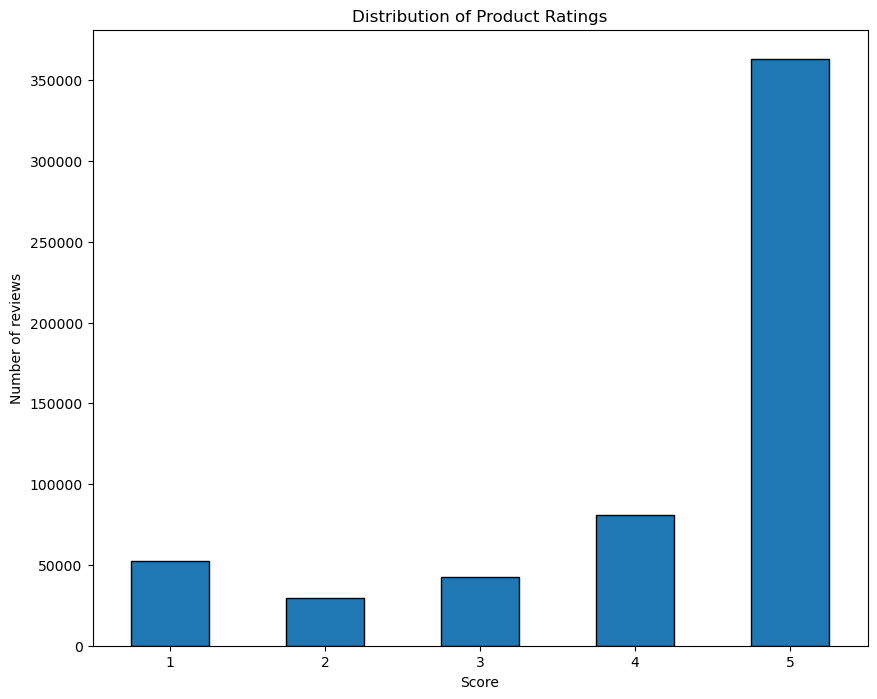

In [15]:
# Plot the distribution of 'Score' (ratings) to understand rating patterns
plt.figure(figsize=(10,8))
df['Score'].value_counts().sort_index().plot(kind='bar',edgecolor='black')
plt.xlabel('Score')
plt.ylabel('Number of reviews')
plt.title('Distribution of Product Ratings')
plt.xticks(rotation=0)
plt.show()


The bar chart above shows the distribution of product ratings in our dataset. Here’s what we can interpret:

Higher ratings dominate: There is a clear skew towards higher ratings, with the majority of reviews being rated as 4 or 5. This suggests that most customers had positive experiences.
Fewer low ratings: Ratings of 1 and 2 are less common, indicating that fewer customers were dissatisfied.

In [17]:
# Calculate average helpfulness score by rating
# Helpfulness score is given by (HelpfulnessNumerator / HelpfulnessDenominator)
# Filter to avoid division by zero
df = df[df['HelpfulnessDenominator'] != 0]
df['HelpfulnessScore'] = df['HelpfulnessNumerator'] / df['HelpfulnessDenominator']


/var/folders/_4/7_nyz1fs58v7y9k0_6bc3prc0000gn/T/ipykernel_85790/4076355769.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['HelpfulnessScore'] = df['HelpfulnessNumerator'] / df['HelpfulnessDenominator']


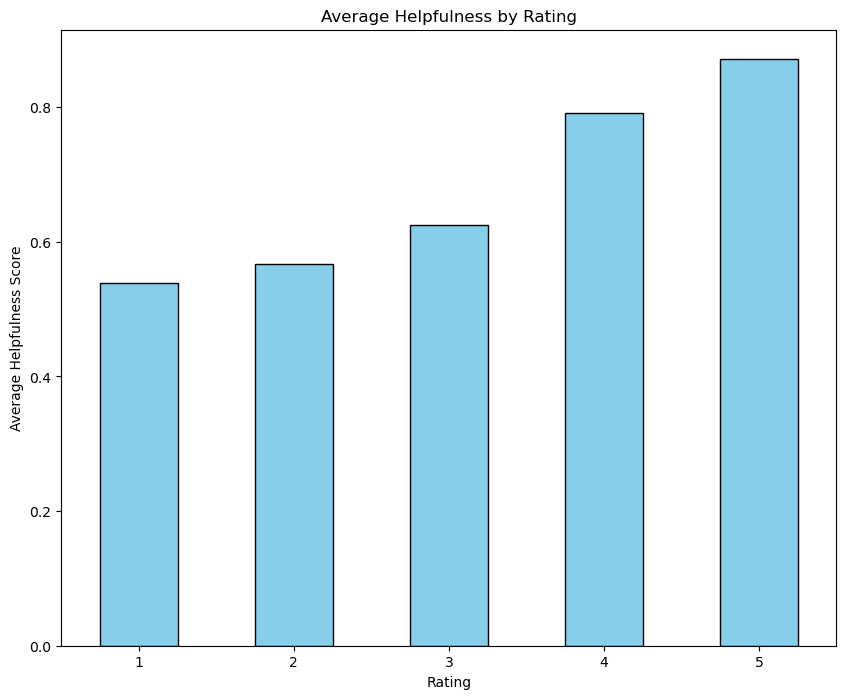

In [21]:
# Group by score and then calculate the average helpfulnessscore

avg_helpfulness_by_rating = df.groupby('Score')['HelpfulnessScore'].mean()

# Plot the average helpfulness score by rating

plt.figure(figsize=(10,8))
avg_helpfulness_by_rating.plot(kind='bar',edgecolor='black',color='skyblue')
plt.title('Average Helpfulness by Rating')
plt.xlabel('Rating')
plt.ylabel('Average Helpfulness Score')
plt.xticks(rotation=0)
plt.show()

The bar chart above displays the average helpfulness score by rating. Here’s a summary of the insights:

Higher-rated reviews tend to have higher helpfulness scores: This suggests that reviews with higher ratings are often found more helpful by other users, possibly because they’re more detailed or positive experiences resonate better.
Lower helpfulness for lower ratings: Lower ratings (such as 1 or 2) have slightly lower helpfulness scores, which could mean that users find these reviews less informative or relevant.

/var/folders/_4/7_nyz1fs58v7y9k0_6bc3prc0000gn/T/ipykernel_85790/4274351188.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ReviewLength'] = df['Text'].apply(len)


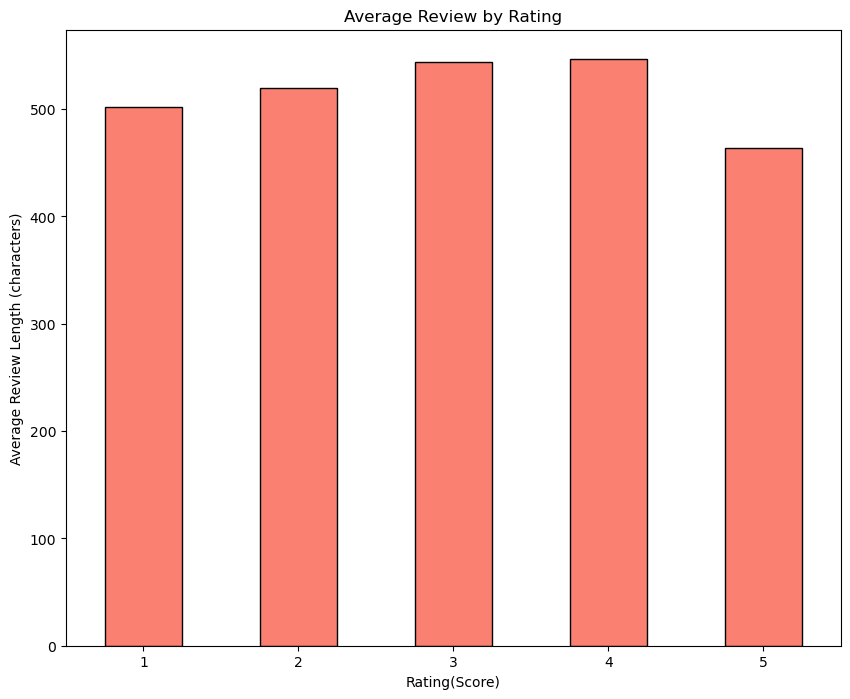

In [26]:
# Calculate the length of each review (number of character in text)
df['ReviewLength'] = df['Text'].apply(len)

# Calculate the average length by rating
avg_len_by_rating = df.groupby('Score')['ReviewLength'].mean()

# plot the average review by rating

plt.figure(figsize=(10,8))
avg_len_by_rating.plot(kind='bar',edgecolor='black',color ='salmon')
plt.title('Average Review by Rating')
plt.xlabel('Rating(Score)')
plt.ylabel('Average Review Length (characters)')
plt.xticks(rotation=0)
plt.show()

The bar chart above illustrates the average review length by rating. Here are some insights:

Longer reviews for extreme ratings: Reviews with ratings of 1 or 5 tend to be longer. This often happens because customers with strong positive or negative experiences are more likely to provide detailed feedback.
Shorter reviews for moderate ratings: Ratings in the middle (e.g., 3) tend to have shorter reviews, suggesting that moderately satisfied customers may leave less detailed feedback.
